# Face Recognition and Landmark detection using DLIB

## `Part 1`

## Detect facial landmarks and face reidentification (from the image)

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import face_recognition

In [2]:
image = face_recognition.load_image_file("test_img.jpg")
face_locations = face_recognition.face_locations(image)
face_landmarks_list = face_recognition.face_landmarks(image)

# ------------------
image_2 = cv2.imread("test_img.jpg")

x1:  418
y1:  247
x2:  803
y2:  632


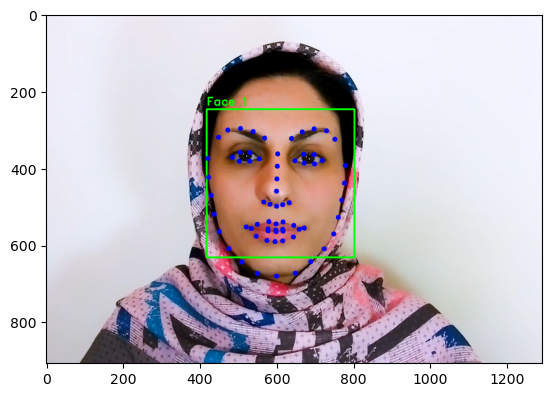

In [3]:
for (y1,x2,y2,x1) in face_locations:
    print("x1: ", x1)
    print("y1: ", y1)
    print("x2: ", x2)
    print("y2: ", y2)
    final_image = cv2.rectangle(image_2, (x1, y1), (x2, y2), (0, 255, 0), 4)
    cv2.putText(final_image, "Face 1", (x1, y1-10), cv2.FONT_HERSHEY_DUPLEX, 1.0, (0, 255, 0), 2)

for k, v in face_landmarks_list[0].items():
    for (x, y) in v:
        final_image = cv2.circle(image_2, (x, y), 3, (255, 0, 0), 5)
        
        
plt.imshow(cv2.cvtColor(final_image, cv2.COLOR_BGR2RGB))

# cv2.imshow("Image", final_image)
# cv2.waitKey()
# cv2.destroyAllWindows()

## Detect facial landmarks and face reidentification (in real-time mode using a webcam)

In [1]:
import face_recognition
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cap = cv2.VideoCapture(1)

In [3]:
if (cap.isOpened() == False):
    print("Error opening the video file")
else:
    fps = cap.get(5)
    print('Frames per second : ', fps,'FPS')
    frame_width = int(cap.get(3))
    print('Frames width : ', frame_width)
    frame_height = int(cap.get(4))
    print('Frames height : ', frame_height)
    frame_count = cap.get(7)
    print('Frame count : ', frame_count)

Frames per second :  29.97002997002997 FPS
Frames width :  640
Frames height :  480
Frame count :  -1.0


In [4]:
fourcc = cv2.VideoWriter_fourcc('X','V','I','D')
output = cv2.VideoWriter(r'C:\Users\Arezoo_D\Codes-Internship\05-Task No.5\output_facial_landmark.avi', fourcc, 5, (frame_width,frame_height))

In [6]:
while True:
    ret, frame = cap.read()
    if ret:
        rgb_frame = frame[:, :, ::-1]
        face_locations = face_recognition.face_locations(rgb_frame)
        face_landmarks_list = face_recognition.face_landmarks(rgb_frame)
        
        if len(face_locations) != 0:
            for (y1,x2,y2,x1) in face_locations:
                # y1 -> top
                # x2 -> right
                # y2 -> bottom
                # x1 -> left
                cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 4)
                cv2.putText(frame, "Face 1", (x1, y1-10), cv2.FONT_HERSHEY_DUPLEX, 1.0, (0, 255, 0), 2)
                
            for k, v in face_landmarks_list[0].items():
                for (x, y) in v:
                    cv2.circle(frame, (x, y), 1, (255, 0, 0), 2)
            
    
        output.write(frame)
        cv2.imshow("frame", frame)
        
        key = cv2.waitKey(25)
        if key == ord('q'):
            break
    else:
        break
        
cap.release()
output.release()
cv2.destroyAllWindows()

## `Part 2`

## Face recognition (from the webcam)

In [7]:
import face_recognition
import cv2
import numpy as np
import os

In [9]:
"""This cell -> For saving images from the webcam use the space key"""

c = 0
path = r"C:\Users\Arezoo_D\Codes-Internship\05-Task No.5\images"

cap = cv2.VideoCapture(1)
while True:
    ret, frame = cap.read()
    cv2.imshow('Webcam', frame)
    key = cv2.waitKey(1)
    if  key == 13: 
        # 13 means -> the Enter Key
        break
    elif key == 32: 
        # 32 means -> the Space Key
        c += 1
        image_path = os.path.join(path, str(c)+".png")
        print("save to: ", image_path)
        cv2.imwrite(image_path, frame)

cap.release()
cv2.destroyAllWindows()     

In [78]:
cap_2 = cv2.VideoCapture(1)

# --------------------------------
if (cap_2.isOpened() == False):
    print("Error opening the video file")
else:
    fps = cap_2.get(5)
    print('Frames per second : ', fps,'FPS')
    frame_width = int(cap_2.get(3))
    print('Frames width : ', frame_width)
    frame_height = int(cap_2.get(4))
    print('Frames height : ', frame_height)
    frame_count = cap_2.get(7)
    print('Frame count : ', frame_count)

Frames per second :  29.97002997002997 FPS
Frames width :  640
Frames height :  480
Frame count :  -1.0


In [79]:
fourcc = cv2.VideoWriter_fourcc('X','V','I','D')
output_2 = cv2.VideoWriter(r"C:\Users\Arezoo_D\Codes-Internship\05-Task No.5\output_face_recognition.avi", fourcc, 5, (frame_width,frame_height))

In [80]:
path = r"C:\Users\Arezoo_D\Codes-Internship\05-Task No.5\images"
images = os.listdir(path)
print(images) 

['Arezoo Dahesh.png', 'Elon Musk.png', 'Jeff Bezos.png', 'maryam mirzakhani.png']


In [83]:
known_face_encodings = []
known_face_names = []

path = r"C:\Users\Arezoo_D\Codes-Internship\05-Task No.5\images"
images = os.listdir(path)

for i in images:
    image = face_recognition.load_image_file(path + "\{}".format(i))
    face_encoding = face_recognition.face_encodings(image)[0]
    known_face_encodings.append(face_encoding)
    
    # output image title -> name and family
    known_face_names.append(i.split(".")[0])
    
    # output image title -> name and family
    # known_face_names.append((i.split(".")[0]).split()[0])

face_locations = []
face_encodings = []
face_names = []

while True:
    ret, frame = cap_2.read()
    if ret:
        small_frame = cv2.resize(frame, (0, 0), fx=0.25, fy=0.25)
        rgb_small_frame = small_frame[:, :, ::-1]
        
        face_locations = face_recognition.face_locations(rgb_small_frame)
        face_encodings = face_recognition.face_encodings(rgb_small_frame, face_locations)

        face_names = []
        for face_encoding in face_encodings:
            matches = face_recognition.compare_faces(known_face_encodings, face_encoding)
            name = "Unknown"

            face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
            best_match_index = np.argmin(face_distances)
            if matches[best_match_index]:
                name = known_face_names[best_match_index]

            face_names.append(name)

            
        for (top, right, bottom, left), name in zip(face_locations, face_names):
            top *= 4
            right *= 4
            bottom *= 4
            left *= 4

            cv2.rectangle(frame, (left, top), (right, bottom), (0, 0, 255), 2)
            cv2.rectangle(frame, (left, top-25), (right, top), (0, 0, 255), cv2.FILLED)
            font = cv2.FONT_HERSHEY_COMPLEX_SMALL
            cv2.putText(frame, name, (left + 6, top - 6), font, 1.0, (255, 255, 255), 1)

        output_2.write(frame)
        cv2.imshow('Video', frame)

        key = cv2.waitKey(25)
        if key == ord('q'):
            break
        
    else:
        break

cap_2.release()
output_2.release()
cv2.destroyAllWindows()